# Импорт модулей

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функции

In [193]:
def merge_dataframes(df1, df2):
    """
    Объединяем два датафрейма по строкам, удаляя столбец 'Id'.

    :param df1: Первый датафрейм
    :param df2: Второй датафрейм
    :return: Объединенный датафрейм
    """
    # Удаление столбца 'Id', если он существует
    df1 = df1.drop(columns=['Id'], errors='ignore')
    df2 = df2.drop(columns=['Id'], errors='ignore')

    # Объединение датафреймов
    merged_df = pd.concat([df1, df2], ignore_index=True)

    return merged_df


def calculate_correlation(df, method='pearson'):
    """
    Вычисляем корреляцию между числовыми столбцами датафрейма.

    :param df: данные
    :param method: Метод корреляции ('pearson', 'spearman', 'kendall')
    :return: Матрица корреляции
    """
    df = df.fillna(0)
    correlation_matrix = round(df.corr(method=method), 2)

    return correlation_matrix


def convert_to_numerical(df, column, mapping):
    """
    Преобразует категориальные значения в числовые на основе заданного отображения.

    :param df: DataFrame, содержащий данные
    :param column: Название столбца, который нужно преобразовать
    :param mapping: Словарь, где ключи - это оригинальные значения, а значения - числовые
    :return: DataFrame с преобразованным столбцом
    """
    df[column] = df[column].map(mapping)

    return df


def plot_boxplot(df, x_column, y_column, title, xlabel, ylabel):
    """
    Строим box plot для столбцов по умолчанию (Outcome и Glucose)

    :param df: данные
    :param x_column: Столбец для оси X
    :param y_column: Столбец для оси Y
    :param title: Заголовок графика
    :param xlabel: Подпись оси X
    :param ylabel: Подпись оси Y
    """
    # Построение box-plot для уровня глюкозы и риска диабета
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_column, y=y_column, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=[0, 1], labels=['No disease', 'Disease'])
    plt.show()


def plot_heatmap(correlation_matrix, title='Correlation Heatmap', a=10, b=8):
    """
    Строим тепловую карту для матрицы корреляции.

    :param correlation_matrix: Матрица корреляции
    :param title: Заголовок графика
    """
    plt.figure(figsize=(a, b))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Первый DataSet

In [4]:
uploaded = files.upload()

dia_raw_data = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


In [5]:
dia_raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dia_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Общий анализ
dia_raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Корреляционный анализ (ассоциация фактора с 'outcome')
correlation = dia_raw_data.corr()
correlation['Outcome'].sort_values(ascending=False) # ascending - параметр сортировки

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [9]:
# Фильтрация всех ненулевых значенией, кроме Pregnancies (может означать, что данные не были замерены)
filtered_df = dia_raw_data[(dia_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] != 0).all(axis=1)]

correlation = filtered_df.corr()
correlation['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.515703
Age,0.350804
Insulin,0.301429
BMI,0.270118
Pregnancies,0.256566
SkinThickness,0.255936
DiabetesPedigreeFunction,0.209330
BloodPressure,0.192673


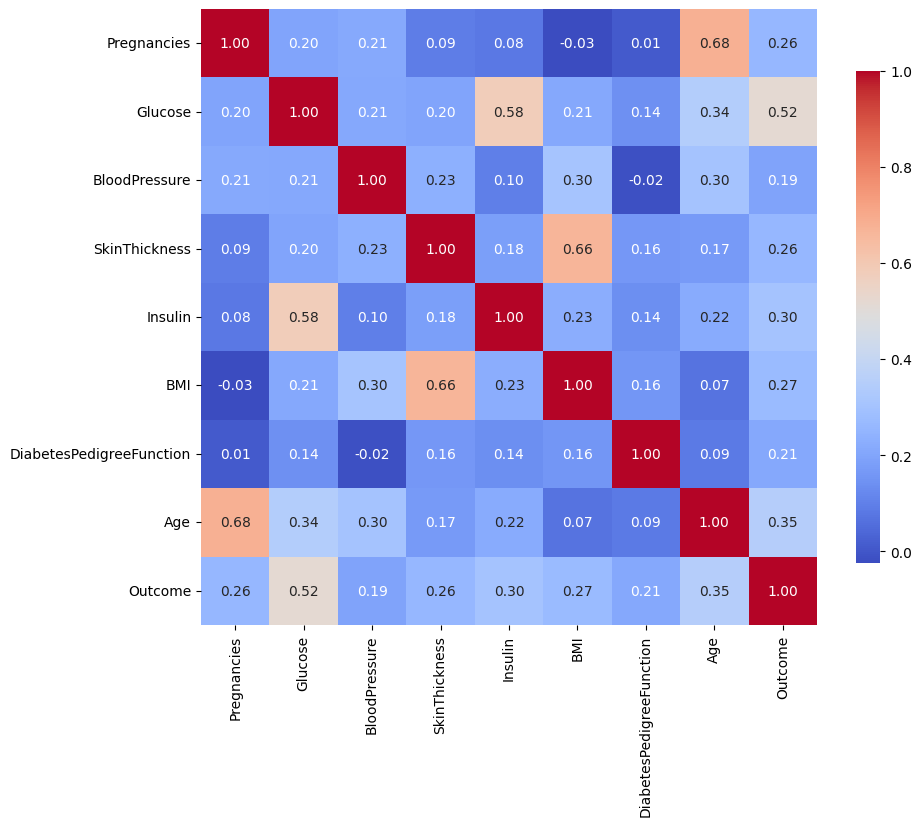

In [62]:
# Визуализация корреляции (например, heatmap)
plot_heatmap(correlation, title='')

Наиболее скоррелированным с риском диабета фактором является уровень глюкозы в крови (> 50%)

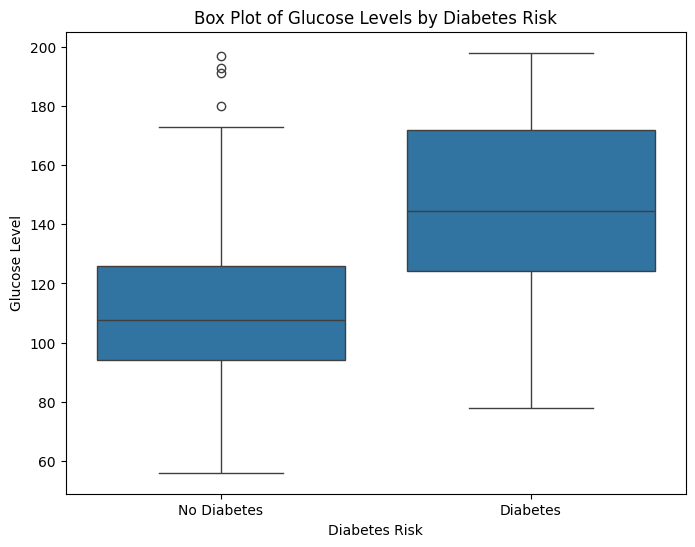

In [58]:
# Построение box-plot для уровня глюкозы и риска диабета
plot_boxplot(filtered_df, x_column='Outcome', y_column='Glucose', title='Box Plot of Glucose Levels by Diabetes Risk', xlabel='Diabetes Risk', ylabel='Glucose Level')

# Второй DataSet

In [202]:
uploaded = files.upload()

cardio_raw_data = pd.read_csv('train.csv')

Saving train.csv to train (2).csv


In [204]:
cardio_raw_data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [206]:
# Приведение имен столбцов к нижнему регистру
dia_raw_data.columns = dia_raw_data.columns.str.capitalize()
cardio_raw_data.columns = cardio_raw_data.columns.str.capitalize()

# Удаление столбца Id
cardio_raw_data = cardio_raw_data.drop(columns=['Id'], errors='ignore')

# Объединение датафреймов по строкам
dia_cardio_data = merge_dataframes(dia_raw_data, cardio_raw_data)
dia_cardio_data

,Highbp,Outcome,Age,Education,Sex,Is_smoking,Cigsperday,Bpmeds,Prevalentstroke,Prevalenthyp,Diabetes,Totchol,Sysbp,Diabp,Bmi,Heartrate,Glucose,Tenyearchd
0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,64.0,2.0,F,YES,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
4,NaN,NaN,36.0,4.0,M,NO,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,NaN,NaN,60.0,1.0,F,NO,0.0,0.0,0.0,0.0,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3389,NaN,NaN,46.0,1.0,F,NO,0.0,0.0,0.0,0.0,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3390,NaN,NaN,44.0,3.0,M,YES,3.0,0.0,0.0,1.0,0.0,352.0,164.0,119.0,28.92,73.0,72.0,1.0
3391,NaN,NaN,60.0,1.0,M,NO,0.0,NaN,0.0,1.0,0.0,191.0,167.0,105.0,23.01,80.0,85.0,0.0


In [207]:
dia_cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393 entries, 0 to 3392
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Highbp           3 non-null      float64
 1   Outcome          3 non-null      float64
 2   Age              3390 non-null   float64
 3   Education        3303 non-null   float64
 4   Sex              3390 non-null   object 
 5   Is_smoking       3390 non-null   object 
 6   Cigsperday       3368 non-null   float64
 7   Bpmeds           3346 non-null   float64
 8   Prevalentstroke  3390 non-null   float64
 9   Prevalenthyp     3390 non-null   float64
 10  Diabetes         3390 non-null   float64
 11  Totchol          3352 non-null   float64
 12  Sysbp            3390 non-null   float64
 13  Diabp            3390 non-null   float64
 14  Bmi              3376 non-null   float64
 15  Heartrate        3389 non-null   float64
 16  Glucose          3086 non-null   float64
 17  Tenyearchd    

In [208]:
dia_cardio_data.describe()

,Highbp,Outcome,Age,Education,Cigsperday,Bpmeds,Prevalentstroke,Prevalenthyp,Diabetes,Totchol,Sysbp,Diabp,Bmi,Heartrate,Glucose,Tenyearchd
count,3.000000,3.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,0.666667,0.333333,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,0.577350,0.577350,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,0.500000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1.000000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,0.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,1.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [209]:
mapping = {
    'YES': 1,
    'NO': 0,
    'M': 1,
    'F': 0
}

# Замена значений в столбце 'Is_smoking'
convert_to_numerical(dia_cardio_data, 'Is_smoking', mapping)

# Замена значений в столбце 'Sex'
convert_to_numerical(dia_cardio_data, 'Sex', mapping)

,Highbp,Outcome,Age,Education,Sex,Is_smoking,Cigsperday,Bpmeds,Prevalentstroke,Prevalenthyp,Diabetes,Totchol,Sysbp,Diabp,Bmi,Heartrate,Glucose,Tenyearchd
0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,64.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
4,NaN,NaN,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,NaN,NaN,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3389,NaN,NaN,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3390,NaN,NaN,44.0,3.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,352.0,164.0,119.0,28.92,73.0,72.0,1.0
3391,NaN,NaN,60.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,191.0,167.0,105.0,23.01,80.0,85.0,0.0


In [214]:
cor_pear = calculate_correlation(dia_cardio_data)
cor_pear

,Highbp,Outcome,Age,Education,Sex,Is_smoking,Cigsperday,Bpmeds,Prevalentstroke,Prevalenthyp,Diabetes,Totchol,Sysbp,Diabp,Bmi,Heartrate,Glucose,Tenyearchd
Highbp,1.00,-0.00,-0.14,-0.04,-0.02,-0.02,-0.02,-0.00,-0.00,-0.02,-0.00,-0.11,-0.14,-0.16,-0.14,-0.15,-0.05,-0.01
Outcome,-0.00,1.00,-0.10,-0.03,-0.01,-0.02,-0.01,-0.00,-0.00,-0.01,-0.00,-0.08,-0.10,-0.12,-0.10,-0.11,-0.04,-0.01
Age,-0.14,-0.10,1.00,-0.16,-0.04,-0.20,-0.18,0.12,0.06,0.31,0.11,0.24,0.42,0.25,0.14,0.03,0.11,0.22
Education,-0.04,-0.03,-0.16,1.00,0.02,0.03,0.02,-0.02,-0.03,-0.08,-0.05,-0.01,-0.11,-0.05,-0.11,-0.02,-0.04,-0.05
Sex,-0.02,-0.01,-0.04,0.02,1.00,0.22,0.33,-0.04,-0.01,0.00,0.01,-0.02,-0.03,0.06,0.09,-0.11,0.06,0.08
Is_smoking,-0.02,-0.02,-0.20,0.03,0.22,1.00,0.76,-0.04,-0.04,-0.12,-0.05,-0.05,-0.14,-0.12,-0.15,0.06,-0.05,0.03
Cigsperday,-0.02,-0.01,-0.18,0.02,0.33,0.76,1.00,-0.04,-0.04,-0.08,-0.05,-0.03,-0.09,-0.06,-0.08,0.07,-0.05,0.07
Bpmeds,-0.00,-0.00,0.12,-0.02,-0.04,-0.04,-0.04,1.00,0.12,0.26,0.07,0.06,0.26,0.20,0.09,0.02,0.04,0.09
Prevalentstroke,-0.00,-0.00,0.06,-0.03,-0.01,-0.04,-0.04,0.12,1.00,0.07,0.01,-0.00,0.06,0.05,-0.02,-0.02,0.03,0.07
Prevalenthyp,-0.02,-0.01,0.31,-0.08,0.00,-0.12,-0.08,0.26,0.07,1.00,0.08,0.14,0.69,0.60,0.27,0.15,0.06,0.17


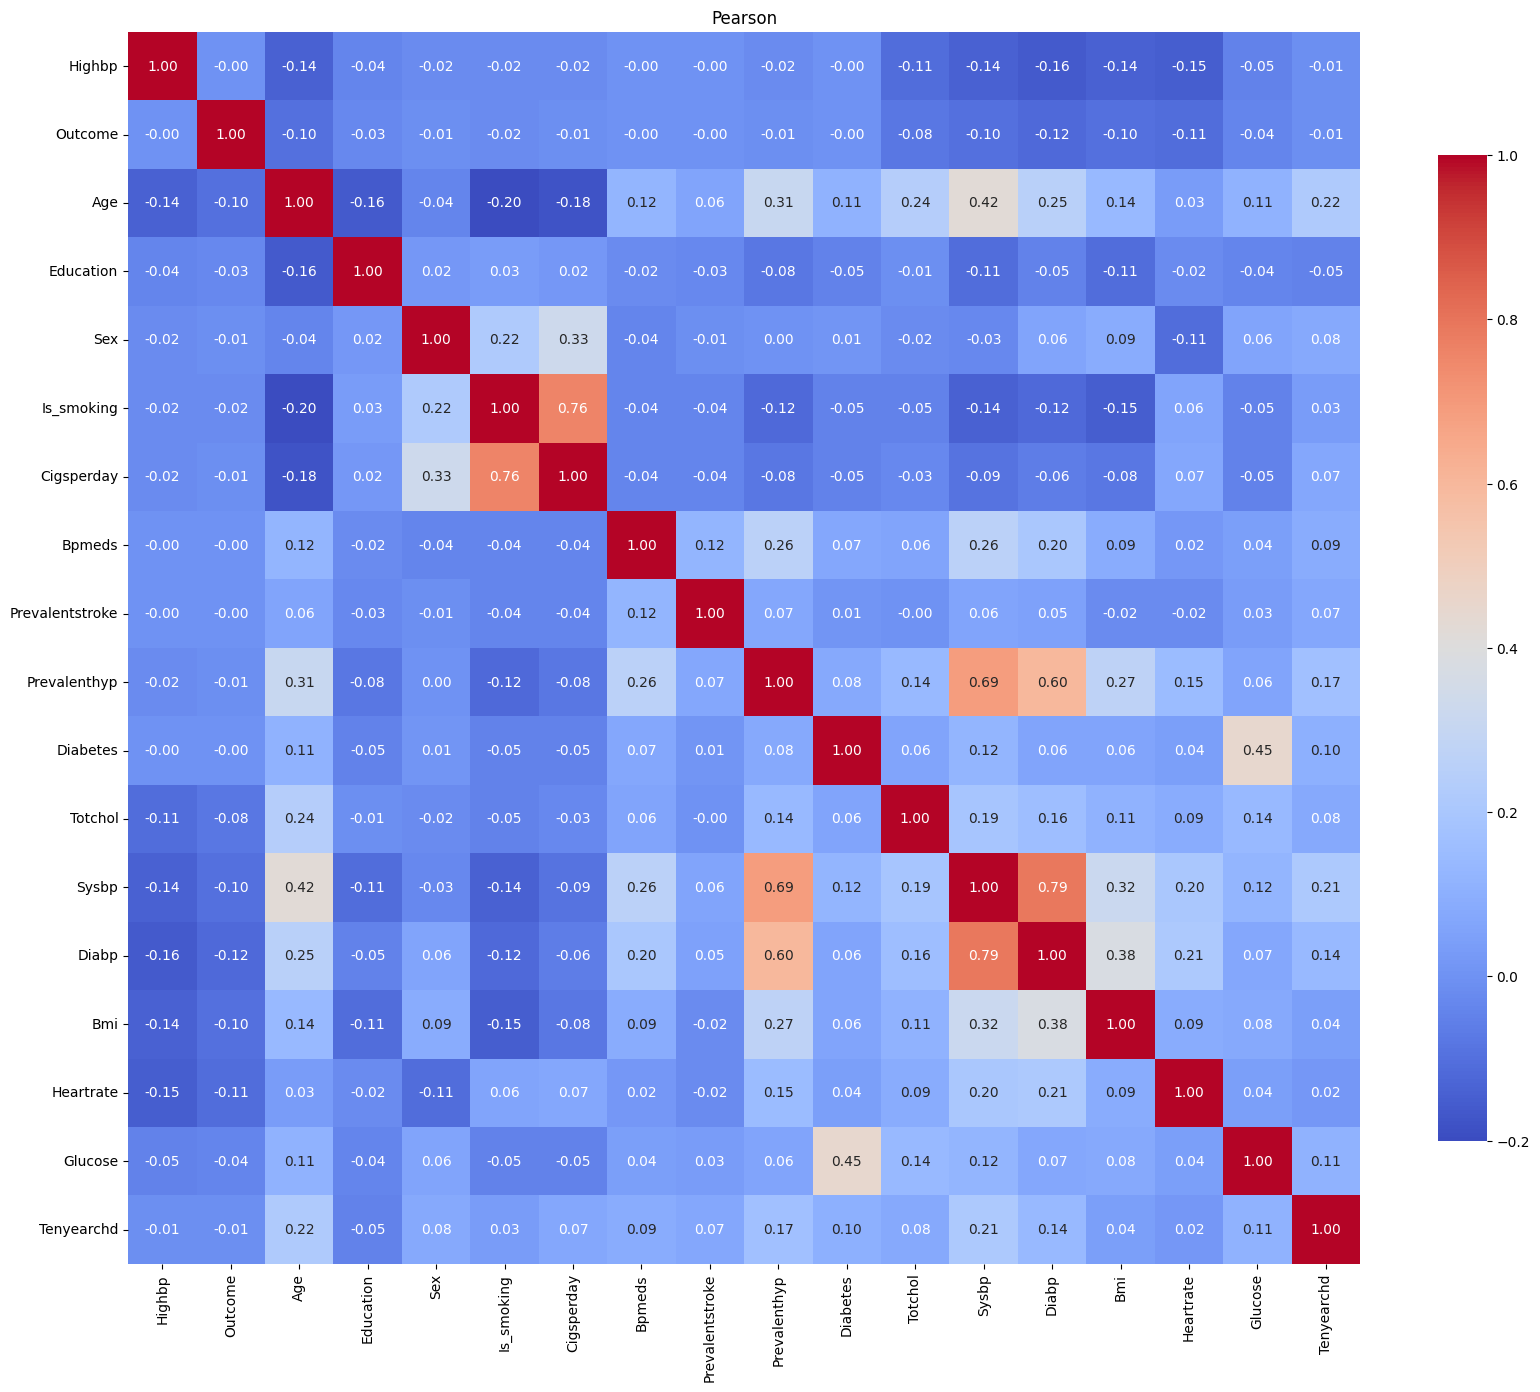

In [215]:
# Построение тепловой карты
plot_heatmap(cor_pear, title='Pearson', a=20, b=16)

Видим, что наиболее коррелирует с коронарной болезнью сердца возраст, а также систолическое давление

Глюкоза по-прежнему высоко коррелирует с риском диабета (45 %)

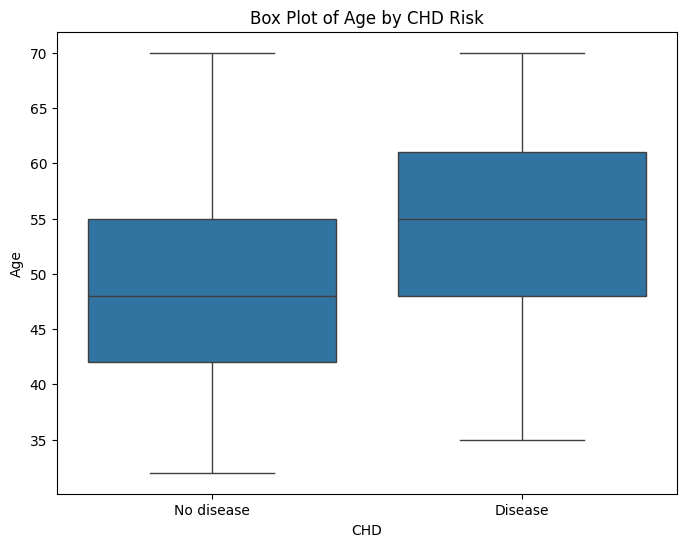

In [216]:
# Построение box-plot для возраста и риска коронарной болезни сердца (CHD)
plot_boxplot(dia_cardio_data, x_column='Tenyearchd', y_column='Age', title='Box Plot of Age by CHD Risk', xlabel='CHD', ylabel='Age')

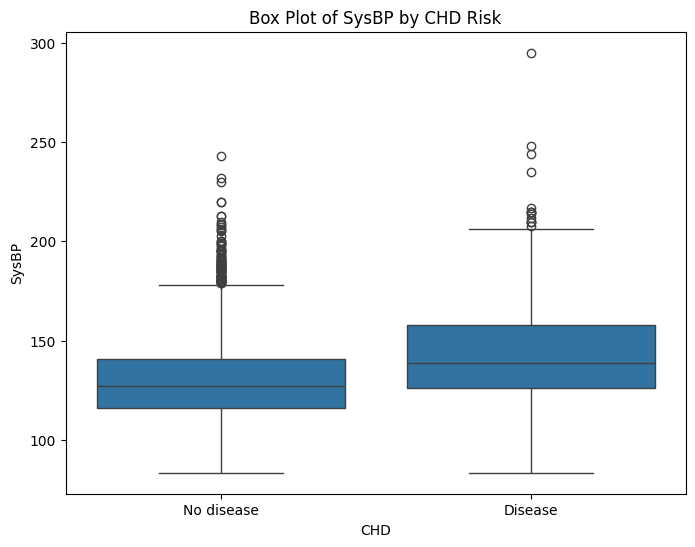

In [217]:
# Построение box-plot для систолического АД и риска коронарной болезни сердца (CHD)
plot_boxplot(dia_cardio_data, x_column='Tenyearchd', y_column='Sysbp', title='Box Plot of SysBP by CHD Risk', xlabel='CHD', ylabel='SysBP')

# Третий DataSet

In [183]:
uplouded = files.upload()

dia_2_raw_data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


In [240]:
dia_2_raw_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [241]:
dia_2_raw_data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [242]:
dia_2_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [243]:
dia_2_raw_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [244]:
dia_cardio_data.rename(columns={'Bmi': 'BMI'}, inplace=True)

In [245]:
# Объединение с третьим датафреймом по столбцу HighBP
final_df = merge_dataframes(dia_cardio_data, dia_2_raw_data)

In [246]:
final_df

,Highbp,Outcome,Age,Education,Sex,Is_smoking,Cigsperday,Bpmeds,Prevalentstroke,Prevalenthyp,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Income
0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,64.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257068,NaN,NaN,5.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,7.0
257069,NaN,NaN,11.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,4.0
257070,NaN,NaN,2.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
257071,NaN,NaN,7.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0


In [247]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257073 entries, 0 to 257072
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Highbp                3 non-null       float64
 1   Outcome               3 non-null       float64
 2   Age                   257070 non-null  float64
 3   Education             256983 non-null  float64
 4   Sex                   257070 non-null  float64
 5   Is_smoking            3390 non-null    float64
 6   Cigsperday            3368 non-null    float64
 7   Bpmeds                3346 non-null    float64
 8   Prevalentstroke       3390 non-null    float64
 9   Prevalenthyp          3390 non-null    float64
 10  Diabetes              3390 non-null    float64
 11  Totchol               3352 non-null    float64
 12  Sysbp                 3390 non-null    float64
 13  Diabp                 3390 non-null    float64
 14  BMI                   257056 non-null  float64
 15  

Text(0, 0.5, 'Density')

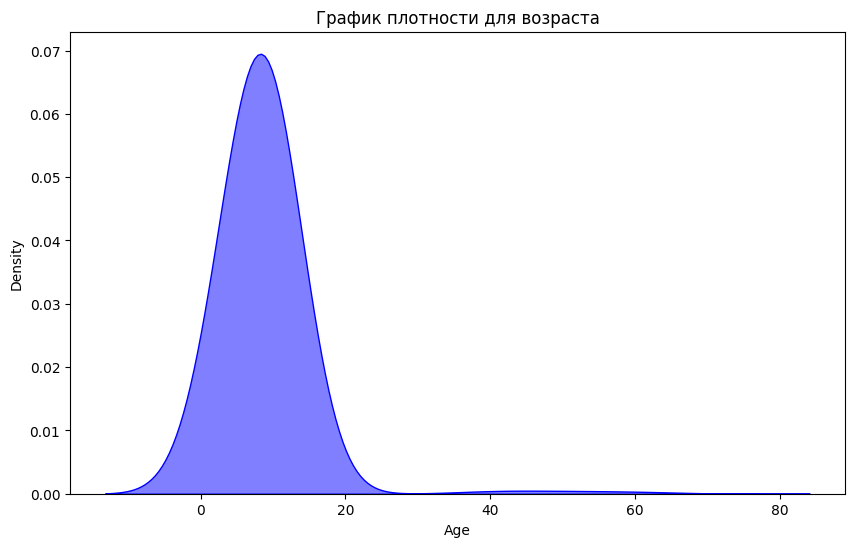

In [264]:
# Построение графика плотности по возрасту
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df['Age'], fill=True, color='blue', alpha=0.5, bw_adjust=10)

# Настройка заголовка и меток
plt.title('График плотности для возраста')
plt.xlabel('Age')
plt.ylabel('Density')

Подавляющее большинство испытуемых по диабету детского возраста (~ 8 лет)

Text(0, 0.5, 'Плотность')

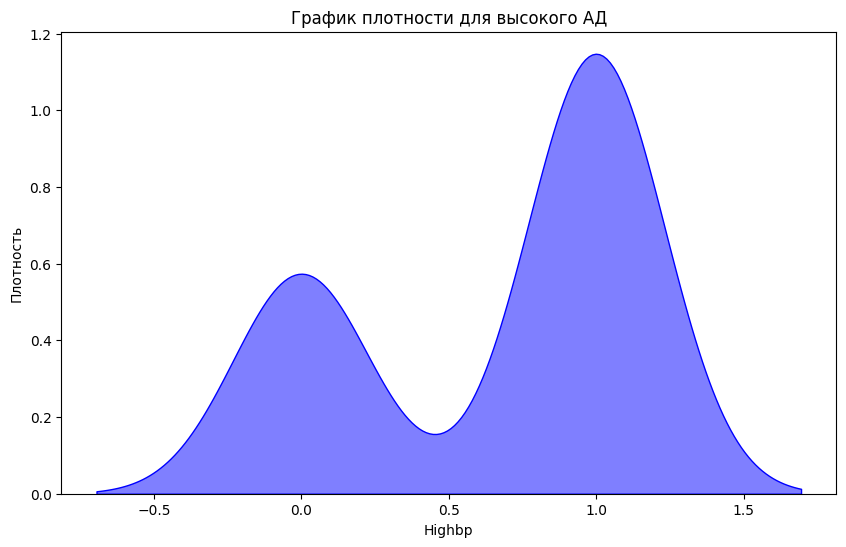

In [258]:
# Построение графика плотности с увеличением масштаба
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df['Highbp'], fill=True, color='blue', alpha=0.5, bw_adjust=0.5)

# Настройка заголовка и меток
plt.title('График плотности для высокого АД')
plt.xlabel('Highbp')
plt.ylabel('Плотность')

Примерно в два раза большее число испытуемых в выборке страдает повышенным артериальным давлением

# Summary



*  Высокая корреляция глюкозы в крови с риском развития диабета (в районе 50 %)
*  Низкая корреляция глюкозы с 10-летним риском болезни сердца (КБС) (~ 10 %)

*  Умеренная положительная корреляция систолического АД с КБС (~ 21 %)
*  Слабая корреляция с диабетом (~ 12 %)

*   Очень слабая корреляция диастолического АД с обоими заболеваниями






